<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Power_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

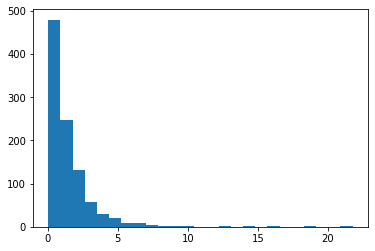

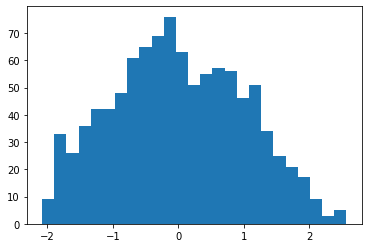

In [8]:
# demonstration of the power transform on data with a skew

from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# generate gaussian data sample
data = randn(1000)

# add a skew to the data distribution
data = exp(data)

# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()

# reshape data to have rows and columns
data = data.reshape((len(data),1))

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

vThe class takes an argument named “method” that can be set to ‘yeo-johnson‘ or ‘box-cox‘ for the preferred method. It will also standardize the data automatically after the transform, meaning each variable will have a zero mean and unit variance. This can be turned off by setting the “standardize” argument to False.

In [9]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)

(208, 61)


In [10]:
# summarize each variable
print(dataset.describe())


               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

<ipython-input-11-1ac8ccbe753f>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9344608490>,
      dtype=object)

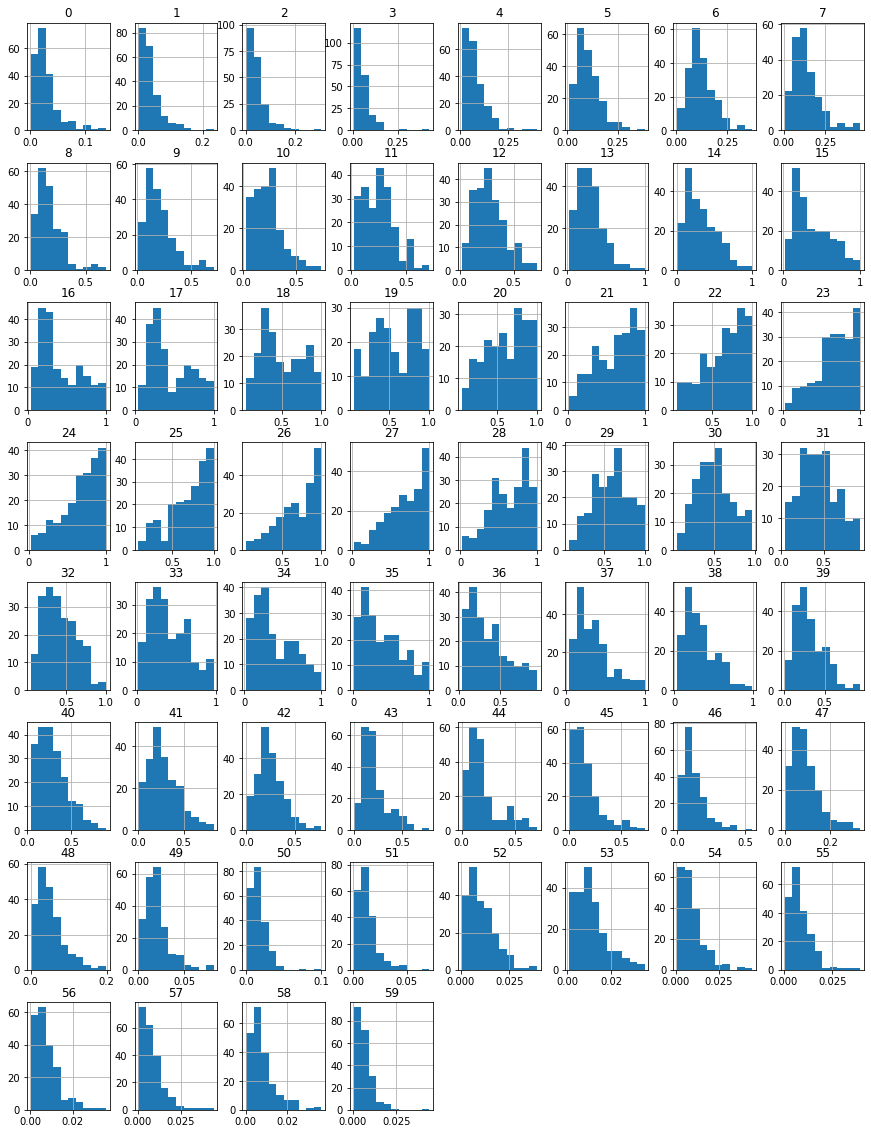

In [11]:
# histograms of the variables
# Plotting a figure of width 3 and height 6
fig =   pyplot.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)

In [12]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

# load dataset

url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]


# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [13]:
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/sonar.csv"

dataset = read_csv(url, header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset
pt = PowerTransformer(method='box-cox')
data = pt.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables

fig =   pyplot.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)

ValueError: ignored

<ipython-input-14-0b61d205545d>:31: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f933f2651f0>,
      dtype=object)

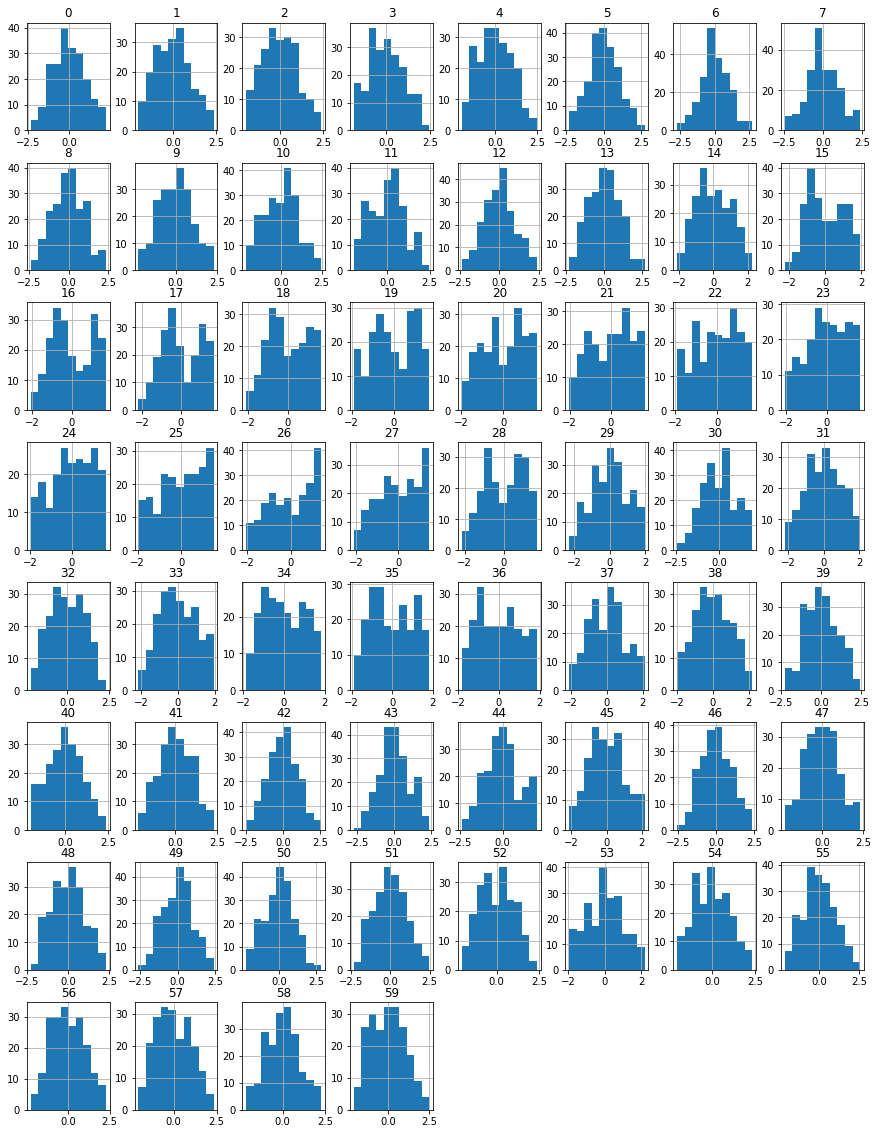

In [14]:
# visualize a box-cox transform of the scaled sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Load dataset
url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/sonar.csv"

dataset = read_csv(url, header=None)
# retrieve just the numeric input values

data = dataset.values[:, :-1]
# perform a box-cox transform of the dataset

scaler = MinMaxScaler(feature_range=(1, 2))

power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig =   pyplot.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)

In [15]:
# evaluate knn on the box-cox sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values

# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


<ipython-input-16-bc4e6ede990d>:25: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax = ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f933ddec310>,
      dtype=object)

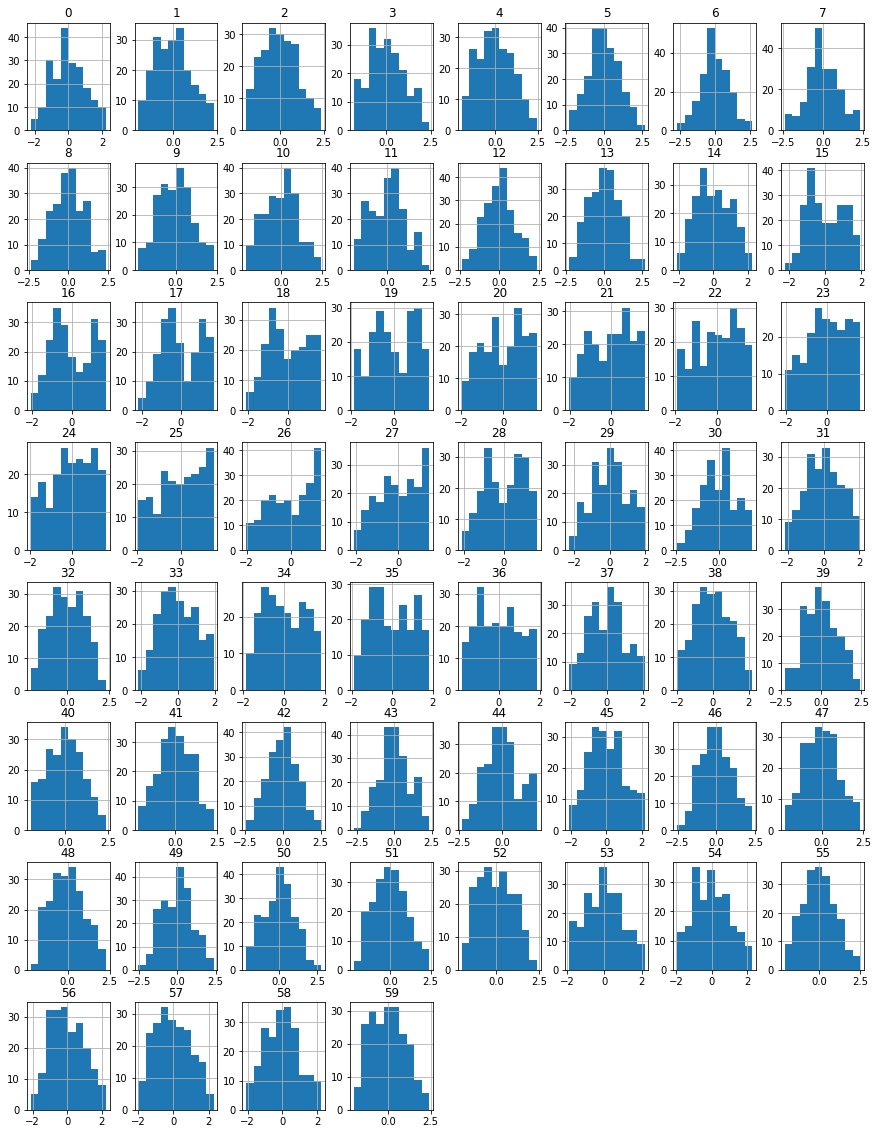

In [16]:

# visualize a yeo-johnson transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/sonar.csv"
dataset = read_csv(url, header=None)

# retrieve just the numeric input values

data = dataset.values[:, :-1]
# perform a yeo-johnson transform of the dataset

pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

# convert the array back to a dataframe

dataset = DataFrame(data)
# histograms of the variables
fig =   pyplot.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)

In [17]:
# evaluate knn on the yeo-johnson sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


In [18]:
# evaluate knn on the yeo-johnson standardized sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)
